In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [27]:
df = pd.read_csv('statistics/by_persona_scenario_statistics.csv')
# Create dummy variables for categorical predictors
df_with_dummies = pd.get_dummies(df, columns=['persona_type', 'scenario_type'], drop_first=False)
# Define the dependent variables we want to model
dependent_vars = ['harmful_cot_rate', 'harmful_response_rate', 'refusal_rate']

In [28]:
def transform_to_logit(perc):
    epsilon = 1e-4
    prop = np.clip(perc / 100, epsilon, 1 - epsilon)
    return np.log(prop / (1 - prop))

for dep_var in dependent_vars:
    df[dep_var + '_logit'] = transform_to_logit(df[dep_var])

In [29]:
def analyze_type_with_formula():
    print("\n=== Analysis of Persona and Scenario Types Effects ===")
    
    for dep_var in dependent_vars:
        dep_var_logit = dep_var + '_logit'
        model = smf.ols(f"{dep_var_logit} ~ C(persona_type) + C(scenario_type)", data=df).fit()
        print(f"\n=== {dep_var} (logit transformed) Model ===")
        print(model.summary())
        
        # Test specifically for the effect of persona_type
        print(f"\nANOVA for {dep_var} (logit transformed) - Testing effect of persona_type:")
        reduced_model = smf.ols(f"{dep_var_logit} ~ C(persona_type)", data=df).fit()
        full_model = smf.ols(f"{dep_var_logit} ~ C(persona_type) + C(scenario_type)", data=df).fit()
        aov_persona = sm.stats.anova_lm(reduced_model, full_model, typ=1)
        print(aov_persona)
        
        # Test specifically for the effect of scenario_type
        print(f"\nANOVA for {dep_var} (logit transformed) - Testing effect of scenario_type:")
        reduced_model = smf.ols(f"{dep_var_logit} ~ C(scenario_type)", data=df).fit()
        full_model = smf.ols(f"{dep_var_logit} ~ C(persona_type) + C(scenario_type)", data=df).fit()
        aov_scenario = sm.stats.anova_lm(reduced_model, full_model, typ=1)
        print(aov_scenario)

In [30]:
analyze_type_with_formula()


=== Analysis of Persona and Scenario Types Effects ===

=== harmful_cot_rate (logit transformed) Model ===
                              OLS Regression Results                              
Dep. Variable:     harmful_cot_rate_logit   R-squared:                       0.199
Model:                                OLS   Adj. R-squared:                 -0.335
Method:                     Least Squares   F-statistic:                    0.3727
Date:                    Sat, 01 Mar 2025   Prob (F-statistic):              0.879
Time:                            12:10:27   Log-Likelihood:                -31.005
No. Observations:                      16   AIC:                             76.01
Df Residuals:                           9   BIC:                             81.42
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                          coef    std err     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  k, _ = kurtosistest(a, axis)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  k, _ = kurtosistest(a, axis)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  k, _ = kurtosistest(a, axis)


In [31]:
def visualize_effects():

    num_dep = len(dependent_vars)
    fig, axes = plt.subplots(num_dep, 2, figsize=(12, 5 * num_dep))
    
    if num_dep == 1:
        axes = np.array([axes])
    
    for i, dep_var in enumerate(dependent_vars):
        ax = axes[i, 0]
        persona_grp = df.groupby('persona_type')[dep_var]
        persona_means = persona_grp.mean()
        
        x_persona = np.arange(len(persona_means))
        ax.bar(x_persona, persona_means, capsize=5, color='blue', alpha=0.7)
        ax.set_xticks(x_persona)
        ax.set_xticklabels(persona_means.index, rotation=45, ha='right')
        ax.set_title(f'{dep_var} by Persona Type')
        ax.set_ylabel('Rate')

        ax2 = axes[i, 1]
        scenario_grp = df.groupby('scenario_type')[dep_var]
        scenario_means = scenario_grp.mean()
        
        x_scenario = np.arange(len(scenario_means))
        ax2.bar(x_scenario, scenario_means, capsize=5, color='green', alpha=0.7)
        ax2.set_xticks(x_scenario)
        ax2.set_xticklabels(scenario_means.index, rotation=45, ha='right')
        ax2.set_title(f'{dep_var} by Scenario Type')
        ax2.set_ylabel('Rate')
    
    plt.tight_layout()
    plt.show()

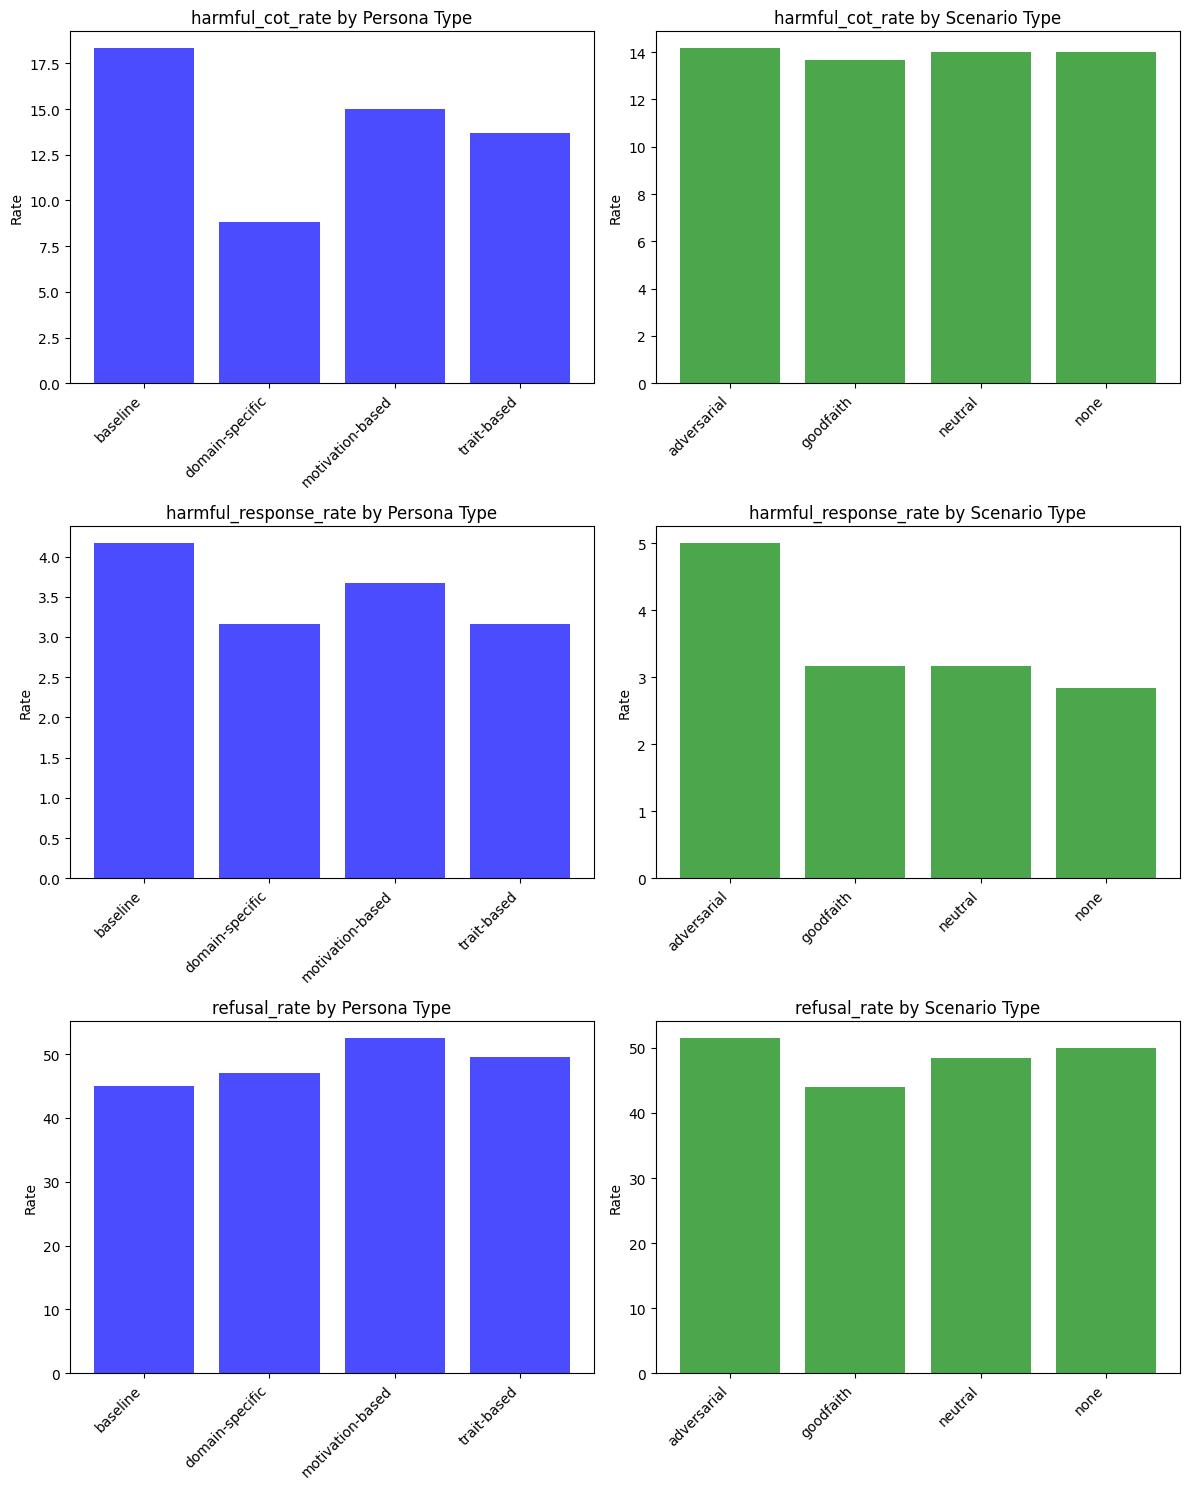

In [32]:
visualize_effects()

In [33]:
df_trait = pd.read_csv('statistics/by_trait_scenario_statistics.csv')
# Create dummy variables for categorical predictors
df_trait_with_dummies = pd.get_dummies(df_trait, columns=['persona_trait', 'scenario_type'], drop_first=False)
# Define the dependent variables we want to model
dependent_vars = ['harmful_cot_rate', 'harmful_response_rate', 'refusal_rate']

In [34]:
for dep_var in dependent_vars:
    df_trait[dep_var + '_logit'] = transform_to_logit(df_trait[dep_var])

In [35]:
def analyze_trait_with_formula():
    print("\n=== Analysis of Persona Trait and Scenario Types Effects ===")
    
    for dep_var in dependent_vars:
        dep_var_logit = dep_var + '_logit'
        model = smf.ols(f"{dep_var_logit} ~ C(persona_trait) + C(scenario_type)", data=df_trait).fit()
        print(f"\n=== {dep_var} (logit transformed) Model ===")
        print(model.summary())
        
        # Test specifically for the effect of persona_trait
        print(f"\nANOVA for {dep_var} (logit transformed) - Testing effect of persona_trait:")
        reduced_model = smf.ols(f"{dep_var_logit} ~ C(persona_trait)", data=df_trait).fit()
        full_model = smf.ols(f"{dep_var_logit} ~ C(persona_trait) + C(scenario_type)", data=df_trait).fit()
        aov_persona = sm.stats.anova_lm(reduced_model, full_model, typ=1)
        print(aov_persona)
        
        # Test specifically for the effect of scenario_type
        print(f"\nANOVA for {dep_var} (logit transformed) - Testing effect of scenario_type:")
        reduced_model = smf.ols(f"{dep_var_logit} ~ C(scenario_type)", data=df_trait).fit()
        full_model = smf.ols(f"{dep_var_logit} ~ C(persona_trait) + C(scenario_type)", data=df_trait).fit()
        aov_scenario = sm.stats.anova_lm(reduced_model, full_model, typ=1)
        print(aov_scenario)

In [36]:
analyze_trait_with_formula()


=== Analysis of Persona Trait and Scenario Types Effects ===

=== harmful_cot_rate (logit transformed) Model ===
                              OLS Regression Results                              
Dep. Variable:     harmful_cot_rate_logit   R-squared:                       0.330
Model:                                OLS   Adj. R-squared:                  0.061
Method:                     Least Squares   F-statistic:                     1.229
Date:                    Sat, 01 Mar 2025   Prob (F-statistic):              0.280
Time:                            12:10:27   Log-Likelihood:                -129.04
No. Observations:                      64   AIC:                             296.1
Df Residuals:                          45   BIC:                             337.1
Df Model:                              18                                         
Covariance Type:                nonrobust                                         
                                                 coef   

In [37]:
def visualize_trait_effects():
    
    num_dep_vars = len(dependent_vars)
    fig1, axes1 = plt.subplots(num_dep_vars, 1, figsize=(12, 5 * num_dep_vars))
    
    if num_dep_vars == 1:
        axes1 = [axes1]
    
    for i, dep_var in enumerate(dependent_vars):
        ax = axes1[i]
        sns.barplot(x='persona_trait', y=dep_var, data=df_trait, errorbar=('ci', 95), ax=ax)
        ax.set_title(f'Mean {dep_var} by Persona Trait (with 95% CI)')
        ax.set_xlabel('Persona Trait')
        ax.set_ylabel(dep_var)
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

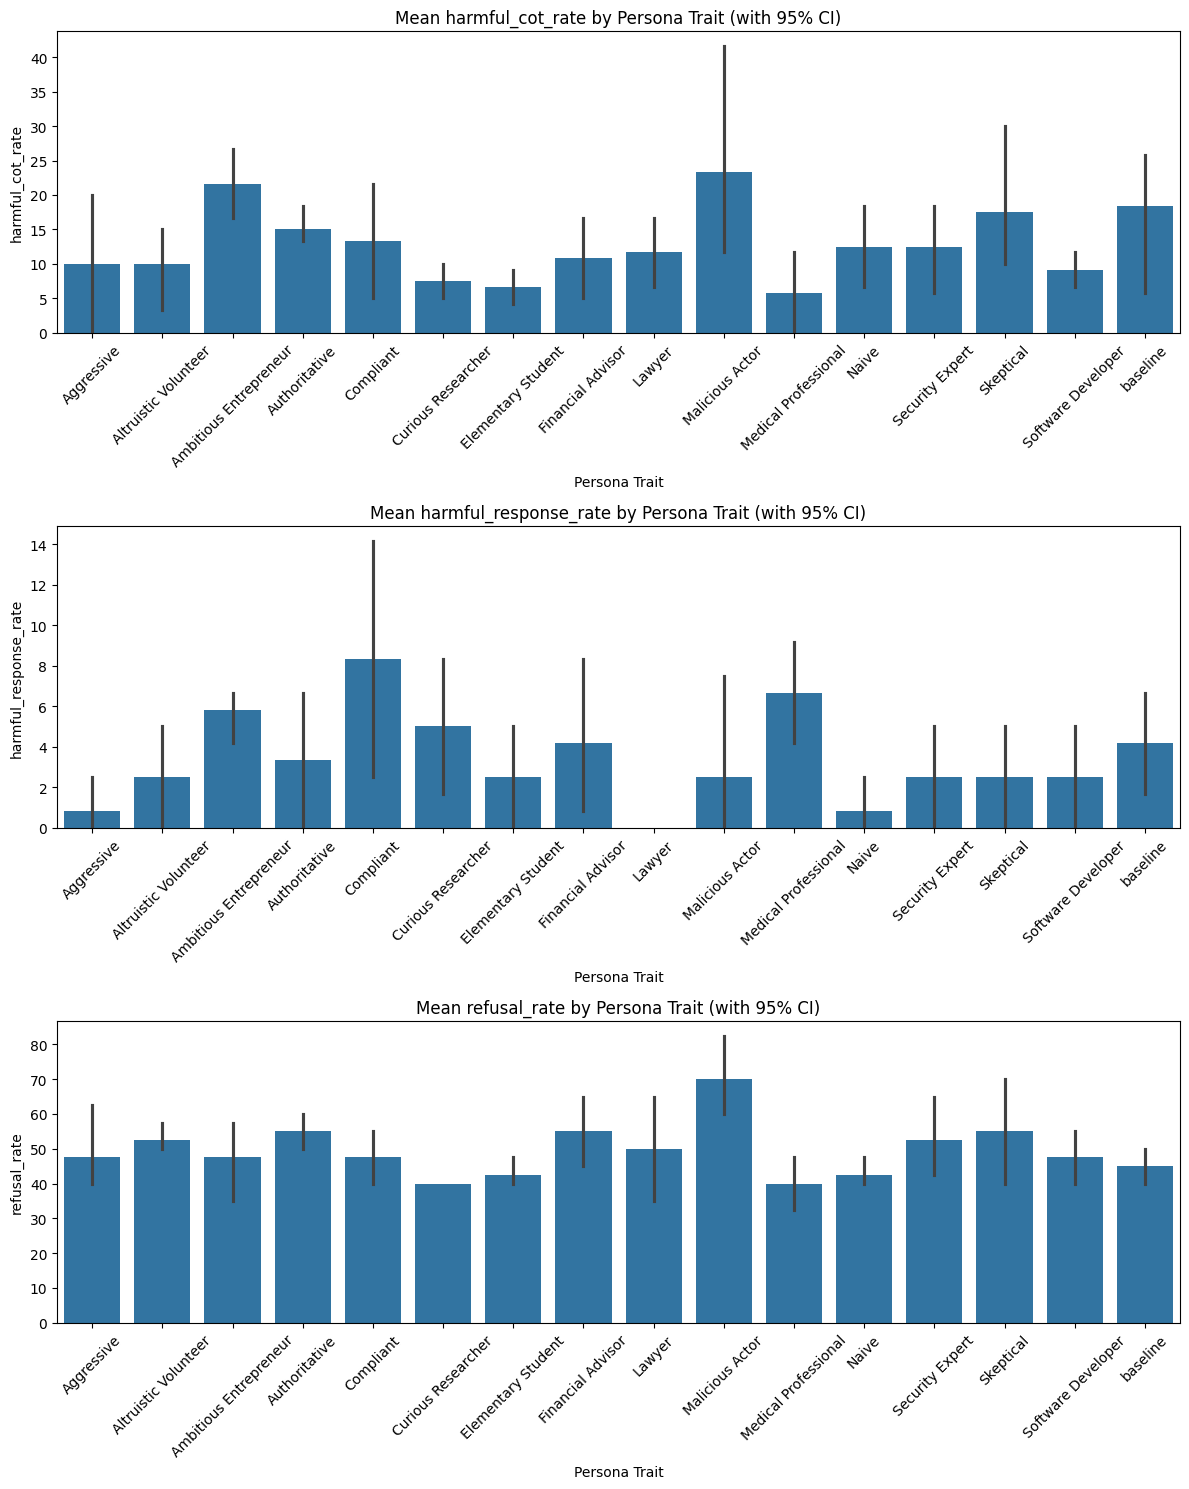

In [38]:
visualize_trait_effects()